In [1]:
%matplotlib inline

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.functional as F
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
from torchdiffeq import odeint
from torchcontrol.arch_cpugpu import HDNN, HDNN_Observer
from torchcontrol.utils import genpoints
import scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from torch.nn import LSTM

In [3]:
if torch.cuda.is_available(): device = torch.device('cuda')

In [4]:
a = 3.0
b = 1.0
c = 1.0
d = 1.0
# Dissipation rate
k = 0.25

In [5]:
# define the ODE
def LV(x,t):
    u = x[0]
    v = x[1]
    dudt = a*u - b*u*v 
    dvdt = -c*v +d*u*v + k*(a-b*v)*v
    return [dudt,dvdt]

In [7]:
# Simulate the systems
N = 1000
Tf = 10
Ts = Tf/N
print('The sampling time is ',Ts,'s')
t = np.linspace(0,Tf,N).tolist()
# standard form
x0 = [0.5,0.5]
x = odeint(LV,x0,t)

The sampling time is  0.01 s


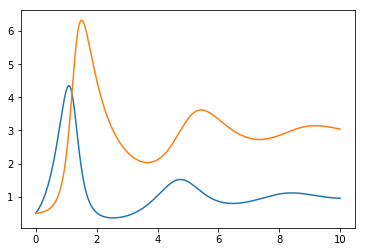

In [8]:
# Plot Time ev. of the system
plt.figure()
plt.plot(t,x)

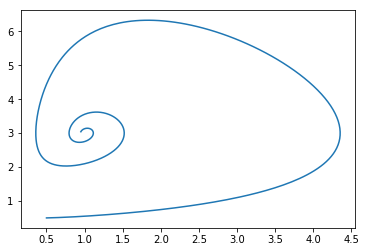

In [9]:
#Plot State-space trajectory
plt.figure()
plt.plot(x[:,0],x[:,1])

In [10]:
# save traj
orig_traj = x

## HDNN

#### Method 1: trajectory ---> vec field

In [15]:
x = torch.Tensor(x).to(device)
labels = x[1:]
x0 = x[0].view(1,2)

In [16]:
obs = HDNN_Observer('MLP', [[2,36,2], False], [1,2,0], 1, 'cpu')

In [17]:
t = obs.observe(x0, labels, epoch=1, ode_t=2, ode_step=2, loss_record_interval=100)

odeint iter: 10 
odeint iter: 20 
odeint iter: 30 
odeint iter: 40 
odeint iter: 50 
odeint iter: 60 
odeint iter: 70 
odeint iter: 80 
odeint iter: 90 
odeint iter: 100 
odeint iter: 110 
odeint iter: 120 
odeint iter: 130 
odeint iter: 140 
odeint iter: 150 
odeint iter: 160 
odeint iter: 170 
odeint iter: 180 
odeint iter: 190 
odeint iter: 200 
odeint iter: 210 
odeint iter: 220 
odeint iter: 230 
odeint iter: 240 
odeint iter: 250 
odeint iter: 260 
odeint iter: 270 
odeint iter: 280 
odeint iter: 290 
odeint iter: 300 
odeint iter: 310 
odeint iter: 320 
odeint iter: 330 
odeint iter: 340 
odeint iter: 350 
odeint iter: 360 
odeint iter: 370 
odeint iter: 380 
odeint iter: 390 
odeint iter: 400 
odeint iter: 410 
odeint iter: 420 
odeint iter: 430 
odeint iter: 440 
odeint iter: 450 
odeint iter: 460 
odeint iter: 470 
odeint iter: 480 
odeint iter: 490 
odeint iter: 500 
odeint iter: 510 
odeint iter: 520 
odeint iter: 530 
odeint iter: 540 
odeint iter: 550 
odeint iter: 560 
o

odeint iter: 4420 
odeint iter: 4430 
odeint iter: 4440 
odeint iter: 4450 
odeint iter: 4460 
odeint iter: 4470 
odeint iter: 4480 
odeint iter: 4490 
odeint iter: 4500 
odeint iter: 4510 
odeint iter: 4520 
odeint iter: 4530 
odeint iter: 4540 
odeint iter: 4550 
odeint iter: 4560 
odeint iter: 4570 
odeint iter: 4580 
odeint iter: 4590 
odeint iter: 4600 
odeint iter: 4610 
odeint iter: 4620 
odeint iter: 4630 
odeint iter: 4640 
odeint iter: 4650 
odeint iter: 4660 
odeint iter: 4670 
odeint iter: 4680 
odeint iter: 4690 
odeint iter: 4700 
odeint iter: 4710 
odeint iter: 4720 
odeint iter: 4730 
odeint iter: 4740 
odeint iter: 4750 
odeint iter: 4760 
odeint iter: 4770 
odeint iter: 4780 
odeint iter: 4790 
odeint iter: 4800 
odeint iter: 4810 
odeint iter: 4820 
odeint iter: 4830 
odeint iter: 4840 
odeint iter: 4850 
odeint iter: 4860 
odeint iter: 4870 
odeint iter: 4880 
odeint iter: 4890 
odeint iter: 4900 
odeint iter: 4910 
odeint iter: 4920 
odeint iter: 4930 
odeint iter:

odeint iter: 8760 
odeint iter: 8770 
odeint iter: 8780 
odeint iter: 8790 
odeint iter: 8800 
odeint iter: 8810 
odeint iter: 8820 
odeint iter: 8830 
odeint iter: 8840 
odeint iter: 8850 
odeint iter: 8860 
odeint iter: 8870 
odeint iter: 8880 
odeint iter: 8890 
odeint iter: 8900 
odeint iter: 8910 
odeint iter: 8920 
odeint iter: 8930 
odeint iter: 8940 
odeint iter: 8950 
odeint iter: 8960 
odeint iter: 8970 
odeint iter: 8980 
odeint iter: 8990 
odeint iter: 9000 
odeint iter: 9010 
odeint iter: 9020 
odeint iter: 9030 
odeint iter: 9040 
odeint iter: 9050 
odeint iter: 9060 
odeint iter: 9070 
odeint iter: 9080 
odeint iter: 9090 
odeint iter: 9100 
odeint iter: 9110 
odeint iter: 9120 
odeint iter: 9130 
odeint iter: 9140 
odeint iter: 9150 
odeint iter: 9160 
odeint iter: 9170 
odeint iter: 9180 
odeint iter: 9190 
odeint iter: 9200 
odeint iter: 9210 
odeint iter: 9220 
odeint iter: 9230 
odeint iter: 9240 
odeint iter: 9250 
odeint iter: 9260 
odeint iter: 9270 
odeint iter:

odeint iter: 12940 
odeint iter: 12950 
odeint iter: 12960 
odeint iter: 12970 
odeint iter: 12980 
odeint iter: 12990 
odeint iter: 13000 
odeint iter: 13010 
odeint iter: 13020 
odeint iter: 13030 
odeint iter: 13040 
odeint iter: 13050 
odeint iter: 13060 
odeint iter: 13070 
odeint iter: 13080 
odeint iter: 13090 
odeint iter: 13100 
odeint iter: 13110 
odeint iter: 13120 
odeint iter: 13130 
odeint iter: 13140 
odeint iter: 13150 
odeint iter: 13160 
odeint iter: 13170 
odeint iter: 13180 
odeint iter: 13190 
odeint iter: 13200 
odeint iter: 13210 
odeint iter: 13220 
odeint iter: 13230 
odeint iter: 13240 
odeint iter: 13250 
odeint iter: 13260 
odeint iter: 13270 
odeint iter: 13280 
odeint iter: 13290 
odeint iter: 13300 
odeint iter: 13310 
odeint iter: 13320 
odeint iter: 13330 
odeint iter: 13340 
odeint iter: 13350 
odeint iter: 13360 
odeint iter: 13370 
odeint iter: 13380 
odeint iter: 13390 
odeint iter: 13400 
odeint iter: 13410 
odeint iter: 13420 
odeint iter: 13430 


odeint iter: 17060 
odeint iter: 17070 
odeint iter: 17080 
odeint iter: 17090 
odeint iter: 17100 
odeint iter: 17110 
odeint iter: 17120 
odeint iter: 17130 
odeint iter: 17140 
odeint iter: 17150 
odeint iter: 17160 
odeint iter: 17170 
odeint iter: 17180 
odeint iter: 17190 
odeint iter: 17200 
odeint iter: 17210 
odeint iter: 17220 
odeint iter: 17230 
odeint iter: 17240 
odeint iter: 17250 
odeint iter: 17260 
odeint iter: 17270 
odeint iter: 17280 
odeint iter: 17290 
odeint iter: 17300 
odeint iter: 17310 
odeint iter: 17320 
odeint iter: 17330 
odeint iter: 17340 
odeint iter: 17350 
odeint iter: 17360 
odeint iter: 17370 
odeint iter: 17380 
odeint iter: 17390 
odeint iter: 17400 
odeint iter: 17410 
odeint iter: 17420 
odeint iter: 17430 
odeint iter: 17440 
odeint iter: 17450 
odeint iter: 17460 
odeint iter: 17470 
odeint iter: 17480 
odeint iter: 17490 
odeint iter: 17500 
odeint iter: 17510 
odeint iter: 17520 
odeint iter: 17530 
odeint iter: 17540 
odeint iter: 17550 


odeint iter: 21180 
odeint iter: 21190 
odeint iter: 21200 
odeint iter: 21210 
odeint iter: 21220 
odeint iter: 21230 
odeint iter: 21240 
odeint iter: 21250 
odeint iter: 21260 
odeint iter: 21270 
odeint iter: 21280 
odeint iter: 21290 
odeint iter: 21300 
odeint iter: 21310 
odeint iter: 21320 
odeint iter: 21330 
odeint iter: 21340 
odeint iter: 21350 
odeint iter: 21360 
odeint iter: 21370 
odeint iter: 21380 
odeint iter: 21390 
odeint iter: 21400 
odeint iter: 21410 
odeint iter: 21420 
odeint iter: 21430 
odeint iter: 21440 
odeint iter: 21450 
odeint iter: 21460 
odeint iter: 21470 
odeint iter: 21480 
odeint iter: 21490 
odeint iter: 21500 
odeint iter: 21510 
odeint iter: 21520 
odeint iter: 21530 
odeint iter: 21540 
odeint iter: 21550 
odeint iter: 21560 
odeint iter: 21570 
odeint iter: 21580 
odeint iter: 21590 
odeint iter: 21600 
odeint iter: 21610 
odeint iter: 21620 
odeint iter: 21630 
odeint iter: 21640 
odeint iter: 21650 
odeint iter: 21660 
odeint iter: 21670 


odeint iter: 25300 
odeint iter: 25310 
odeint iter: 25320 
odeint iter: 25330 
odeint iter: 25340 
odeint iter: 25350 
odeint iter: 25360 
odeint iter: 25370 
odeint iter: 25380 
odeint iter: 25390 
odeint iter: 25400 
odeint iter: 25410 
odeint iter: 25420 
odeint iter: 25430 
odeint iter: 25440 
odeint iter: 25450 
odeint iter: 25460 
odeint iter: 25470 
odeint iter: 25480 
odeint iter: 25490 
odeint iter: 25500 
odeint iter: 25510 
odeint iter: 25520 
odeint iter: 25530 
odeint iter: 25540 
odeint iter: 25550 
odeint iter: 25560 
odeint iter: 25570 
odeint iter: 25580 
odeint iter: 25590 
odeint iter: 25600 
odeint iter: 25610 
odeint iter: 25620 
odeint iter: 25630 
odeint iter: 25640 
odeint iter: 25650 
odeint iter: 25660 
odeint iter: 25670 
odeint iter: 25680 
odeint iter: 25690 
odeint iter: 25700 
odeint iter: 25710 
odeint iter: 25720 
odeint iter: 25730 
odeint iter: 25740 
odeint iter: 25750 
odeint iter: 25760 
odeint iter: 25770 
odeint iter: 25780 
odeint iter: 25790 


odeint iter: 29410 
odeint iter: 29420 
odeint iter: 29430 
odeint iter: 29440 
odeint iter: 29450 
odeint iter: 29460 
odeint iter: 29470 
odeint iter: 29480 
odeint iter: 29490 
odeint iter: 29500 
odeint iter: 29510 
odeint iter: 29520 
odeint iter: 29530 
odeint iter: 29540 
odeint iter: 29550 
odeint iter: 29560 
odeint iter: 29570 
odeint iter: 29580 
odeint iter: 29590 
odeint iter: 29600 
odeint iter: 29610 
odeint iter: 29620 
odeint iter: 29630 
odeint iter: 29640 
odeint iter: 29650 
odeint iter: 29660 
odeint iter: 29670 
odeint iter: 29680 
odeint iter: 29690 
odeint iter: 29700 
odeint iter: 29710 
odeint iter: 29720 
odeint iter: 29730 
odeint iter: 29740 
odeint iter: 29750 
odeint iter: 29760 
odeint iter: 29770 
odeint iter: 29780 
odeint iter: 29790 
odeint iter: 29800 
odeint iter: 29810 
odeint iter: 29820 
odeint iter: 29830 
odeint iter: 29840 
odeint iter: 29850 
odeint iter: 29860 
odeint iter: 29870 
odeint iter: 29880 
odeint iter: 29890 
odeint iter: 29900 


odeint iter: 33520 
odeint iter: 33530 
odeint iter: 33540 
odeint iter: 33550 
odeint iter: 33560 
odeint iter: 33570 
odeint iter: 33580 
odeint iter: 33590 
odeint iter: 33600 
odeint iter: 33610 
odeint iter: 33620 
odeint iter: 33630 
odeint iter: 33640 
odeint iter: 33650 
odeint iter: 33660 
odeint iter: 33670 
odeint iter: 33680 
odeint iter: 33690 
odeint iter: 33700 
odeint iter: 33710 
odeint iter: 33720 
odeint iter: 33730 
odeint iter: 33740 
odeint iter: 33750 
odeint iter: 33760 
odeint iter: 33770 
odeint iter: 33780 
odeint iter: 33790 
odeint iter: 33800 
odeint iter: 33810 
odeint iter: 33820 
odeint iter: 33830 
odeint iter: 33840 
odeint iter: 33850 
odeint iter: 33860 
odeint iter: 33870 
odeint iter: 33880 
odeint iter: 33890 
odeint iter: 33900 
odeint iter: 33910 
odeint iter: 33920 
odeint iter: 33930 
odeint iter: 33940 
odeint iter: 33950 
odeint iter: 33960 
odeint iter: 33970 
odeint iter: 33980 
odeint iter: 33990 
odeint iter: 34000 
odeint iter: 34010 


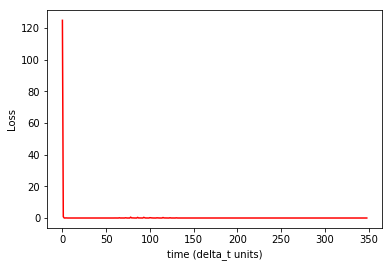

In [18]:
obs.plotLoss()

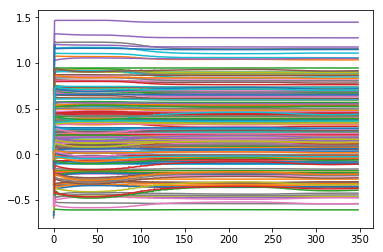

In [19]:
obs.plotParameters()

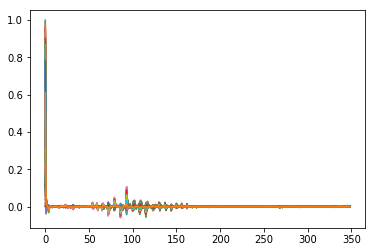

In [20]:
obs.plotVelocities()

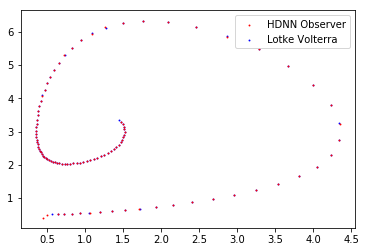

In [21]:
for p in range(len(t)-1):
    plt.scatter(t[p][0][0].cpu().numpy(),t[p][0][1].cpu().numpy(), s=0.8, color='r')
    plt.scatter(labels[p][0].cpu().numpy(),labels[p][1].cpu().numpy(), s=0.8, color='b')
    plt.legend(['HDNN Observer','Lotke Volterra'])

In [53]:
p = torch.Tensor([0.4,0.4]).to(device)
traj = []
for i in range(100):
    traj.append(p.flatten())
    p = obs.predictor(p.view(1,2))    

In [62]:
N = 100
Tf = 5
Ts = Tf/N
print('The sampling time is ',Ts,'s')
t = np.linspace(0,Tf,N).tolist()
# standard form
x0 = [0.4,0.4]
x = odeint(LV,x0,t)

The sampling time is  0.05 s


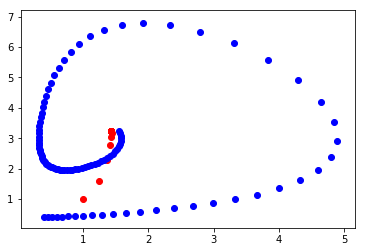

In [64]:
for j in range(len(traj)):
    plt.scatter(traj[j][0].cpu().detach().numpy(), traj[j][1].cpu().detach().numpy(), color='r')
    plt.scatter(x[j][0],x[j][1], color='b')

In [60]:
p = torch.Tensor([1,1]).to(device)
traj = []
for i in range(100):
    traj.append(p.flatten())
    p = obs.predictor(p.view(1,2))    

In [65]:
N = 100
Tf = 5
Ts = Tf/N
print('The sampling time is ',Ts,'s')
t = np.linspace(0,Tf,N).tolist()
# standard form
x0 = [1,1]
x = odeint(LV,x0,t)

The sampling time is  0.05 s


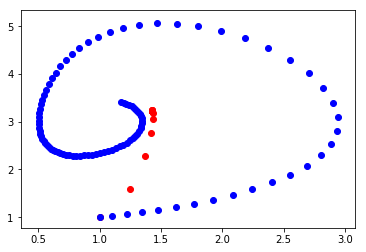

In [66]:
for j in range(len(traj)):
    plt.scatter(traj[j][0].cpu().detach().numpy(), traj[j][1].cpu().detach().numpy(), color='r')
    plt.scatter(x[j][0],x[j][1], color='b')

In [22]:
def calculateComponents(x0, x1):
    return x1[0] - x0[0], x1[1] - x0[1]

In [23]:
mh = genpoints(0.5, 5, 1, 6, 10)

In [24]:
obs.predictor(mh[0].view(1,2))

tensor([[0.9608, 0.6282]], device='cuda:0', grad_fn=<AddmmBackward>)

In [25]:
U, V = [], []
for point in mh:
        un, vn = calculateComponents(point, obs.predictor(point.view(1,2)).flatten())
        U.append(un)
        V.append(vn)

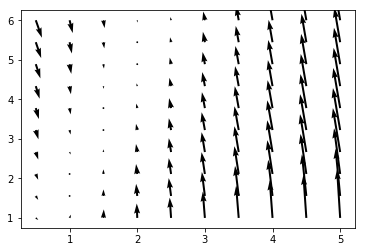

In [26]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [27]:
U, V = [], []
t = torch.linspace(0,Ts)
for point in mh:
        xi0 = point.cpu()        
        sol = odeint(LV, xi0, t)
        un, vn = calculateComponents(point, sol[-1])
        U.append(un)
        V.append(vn)

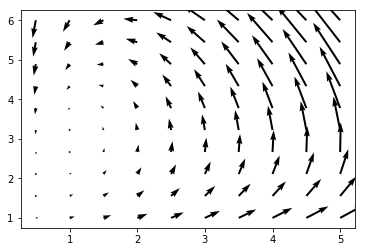

In [28]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

### vec field on trajectory only

In [29]:
U, V = [], []
for point in x:
        un, vn = calculateComponents(point, obs.predictor(point.view(1,2)).flatten())
        U.append(un)
        V.append(vn)

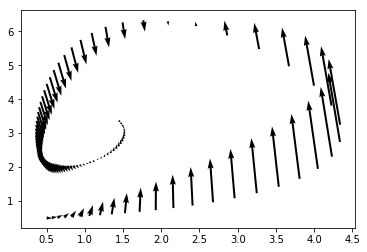

In [30]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [31]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in x:
        xi0 = point.cpu()
        sol = odeint(LV, xi0, t)
        un, vn = calculateComponents(point, sol[-1])
        U.append(un)
        V.append(vn)

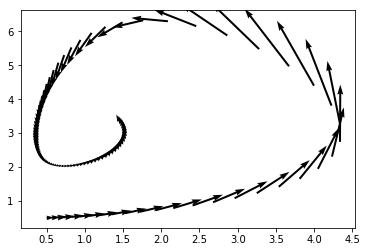

In [32]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

## Method 2: vec field --> trajectory

Two methods attempted: 1st - approximation of derivative with $$\frac{(x_{i+1} - x_{i})}{Ts}$$
2nd - use as labels $$LV(x_{i}, t)$$

In [11]:
x = torch.Tensor(x).to(device)
x[1:]
x0 = x[0].view(1,2)

In [12]:
# with approx
#grad = ([(x[i+1] - x[i])/0.01 for i in range(len(x)-1)])
#grad = torch.Tensor([g.cpu().numpy() for g in grad])
# with real LV
grad = ([LV(x[i], t) for i in range(len(x)-1)])
grad = torch.Tensor([g for g in grad])

In [13]:
train = data_utils.TensorDataset(x[:-1], grad)
trainloader = data_utils.DataLoader(train, batch_size=1499)

In [14]:
obs = HDNN('MLP', [[2, 200, 2], False], [1,1,0], 1, odeint='cpu')

In [15]:
obs.fit(trainloader, epoch=1000, time_delta=100, iter_accuracy=float('inf'), ode_t=0.01, ode_step=2, criterion='mse')

odeint iter: 10 
odeint iter: 20 
odeint iter: 30 
odeint iter: 40 
odeint iter: 50 
odeint iter: 60 
odeint iter: 70 
odeint iter: 80 
odeint iter: 90 
odeint iter: 100 
odeint iter: 110 
odeint iter: 120 
odeint iter: 130 
odeint iter: 140 
odeint iter: 150 
odeint iter: 160 
odeint iter: 170 
odeint iter: 180 
odeint iter: 190 
odeint iter: 200 
odeint iter: 210 
odeint iter: 220 
odeint iter: 230 
odeint iter: 240 
odeint iter: 250 
odeint iter: 260 
odeint iter: 270 
odeint iter: 280 
odeint iter: 290 
odeint iter: 300 
odeint iter: 310 
odeint iter: 320 
odeint iter: 330 
odeint iter: 340 
odeint iter: 350 
odeint iter: 360 
odeint iter: 370 
odeint iter: 380 
odeint iter: 390 
odeint iter: 400 
odeint iter: 410 
odeint iter: 420 
odeint iter: 430 
odeint iter: 440 
odeint iter: 450 
odeint iter: 460 
odeint iter: 470 
odeint iter: 480 
odeint iter: 490 
odeint iter: 500 
odeint iter: 510 
odeint iter: 520 
odeint iter: 530 
odeint iter: 540 
odeint iter: 550 
odeint iter: 560 
o

odeint iter: 4390 
odeint iter: 4400 
odeint iter: 4410 
odeint iter: 4420 
odeint iter: 4430 
odeint iter: 4440 
odeint iter: 4450 
odeint iter: 4460 
odeint iter: 4470 
odeint iter: 4480 
odeint iter: 4490 
odeint iter: 4500 
odeint iter: 4510 
odeint iter: 4520 
odeint iter: 4530 
odeint iter: 4540 
odeint iter: 4550 
odeint iter: 4560 
odeint iter: 4570 
odeint iter: 4580 
odeint iter: 4590 
odeint iter: 4600 
odeint iter: 4610 
odeint iter: 4620 
odeint iter: 4630 
odeint iter: 4640 
odeint iter: 4650 
odeint iter: 4660 
odeint iter: 4670 
odeint iter: 4680 
odeint iter: 4690 
odeint iter: 4700 
odeint iter: 4710 
odeint iter: 4720 
odeint iter: 4730 
odeint iter: 4740 
odeint iter: 4750 
odeint iter: 4760 
odeint iter: 4770 
odeint iter: 4780 
odeint iter: 4790 
odeint iter: 4800 
odeint iter: 4810 
odeint iter: 4820 
odeint iter: 4830 
odeint iter: 4840 
odeint iter: 4850 
odeint iter: 4860 
odeint iter: 4870 
odeint iter: 4880 
odeint iter: 4890 
odeint iter: 4900 
odeint iter:

odeint iter: 8710 
odeint iter: 8720 
odeint iter: 8730 
odeint iter: 8740 
odeint iter: 8750 
odeint iter: 8760 
odeint iter: 8770 
odeint iter: 8780 
odeint iter: 8790 
odeint iter: 8800 
odeint iter: 8810 
odeint iter: 8820 
odeint iter: 8830 
odeint iter: 8840 
odeint iter: 8850 
odeint iter: 8860 
odeint iter: 8870 
odeint iter: 8880 
odeint iter: 8890 
odeint iter: 8900 
odeint iter: 8910 
odeint iter: 8920 
odeint iter: 8930 
odeint iter: 8940 
odeint iter: 8950 
odeint iter: 8960 
odeint iter: 8970 
odeint iter: 8980 
odeint iter: 8990 
odeint iter: 9000 
odeint iter: 9010 
odeint iter: 9020 
odeint iter: 9030 
odeint iter: 9040 
odeint iter: 9050 
odeint iter: 9060 
odeint iter: 9070 
odeint iter: 9080 
odeint iter: 9090 
odeint iter: 9100 


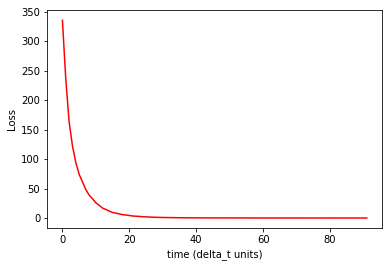

In [16]:
obs.plotLoss()

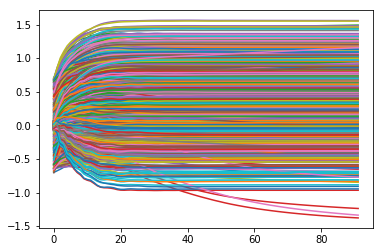

In [17]:
obs.plotParameters()

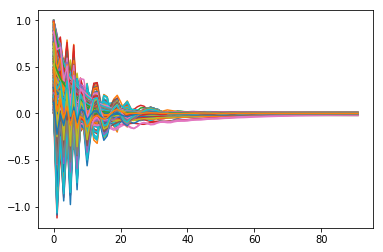

In [18]:
obs.plotVelocities()

In [19]:
def calculateComponents(x0, x1):
    return x1[0] - x0[0], x1[1] - x0[1]

In [20]:
mh = genpoints(0, 4.5, 1, 6.5, 15)

In [21]:
U, V = [], []
for point in mh:
        un, vn = obs.predictor(point.view(1,2))[0][0], obs.predictor(point.view(1,2))[0][1]
        U.append(un)
        V.append(vn)

In [22]:
# save for other plots
Uo, Vo = U, V

Text(0.5, 1.0, 'Learned vec field')

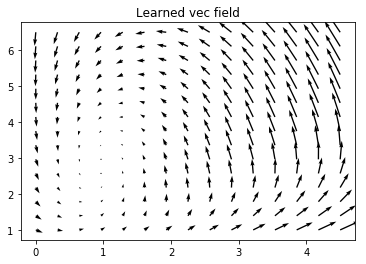

In [23]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])
plt.title("Learned vec field")

In [24]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in mh:
        xi0 = point.cpu()
        sol = odeint(LV, xi0, t)
        un, vn = calculateComponents(point, sol[-1])
        U.append(un)
        V.append(vn)

Text(0.5, 1.0, 'Ground-truth next point trajectories (1Ts integration)')

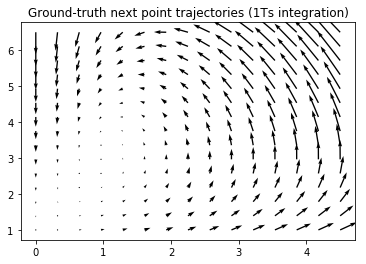

In [25]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])
plt.title("Ground-truth next point trajectories (1Ts integration)")

In [26]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in mh:
        xi0 = point.cpu()
        un, vn = LV(xi0, t)
        U.append(un)
        V.append(vn)

Text(0.5, 1.0, 'LV vec field')

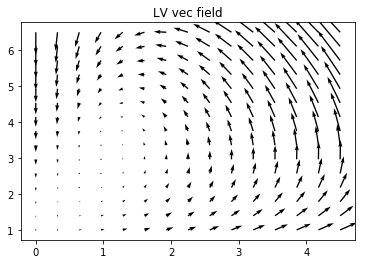

In [27]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])
plt.title("LV vec field")

Text(0.5, 1.0, 'Lotke-Volterra reconstruction')

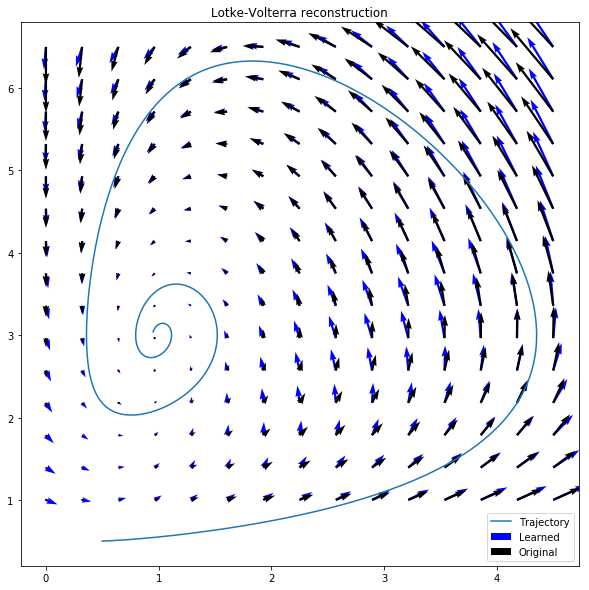

In [28]:
plt.figure(figsize=(10,10))
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in Uo], [v.detach().cpu() for v in Vo], color='blue')
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V], color='black')
plt.plot(orig_traj[:,0],orig_traj[:,1])
plt.legend(['Trajectory','Learned','Original'])
plt.title("Lotke-Volterra reconstruction")

### vec field on trajectory only

In [29]:
U, V = [], []
for i, point in enumerate(x[:-1]):
        un, vn = grad[i][0], grad[i][1]
        U.append(un)
        V.append(vn)

Text(0.5, 1.0, 'Supervised labels')

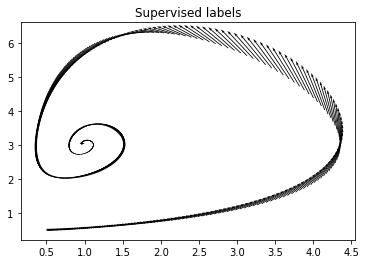

In [30]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])
plt.title('Supervised labels')

In [31]:
U, V = [], []
for point in x:
        un, vn = obs.predictor(point.view(1,2))[0][0], obs.predictor(point.view(1,2))[0][1]
        U.append(un)
        V.append(vn)

Text(0.5, 1.0, 'Learned vector field')

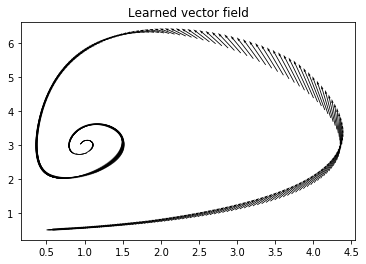

In [32]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])
plt.title('Learned vector field')

In [33]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in x:
        xi0 = point.cpu()
        un, vn = LV(xi0, t)
        U.append(un)
        V.append(vn)

Text(0.5, 1.0, 'Vector field (ground-truth)')

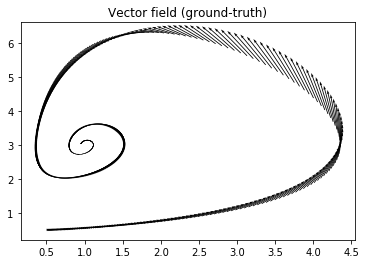

In [34]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])
plt.title('Vector field (ground-truth)')

## Error contour plot

In [35]:
x = np.linspace(0.2, 4.5, 100)
y = np.linspace(0.5, 6.5, 100)
X, Y = np.meshgrid(x, y)

In [36]:
def normedDifference(x, y):
    '''
    :x: cuda tensor with grad
    :y: np.array or list
    '''
    return np.sqrt(np.square(x[0].detach().cpu() - y[0]) + \
    np.square(x[1].detach().cpu() - y[1]))/np.linalg.norm(y)   


In [37]:
# integrate for Ts time
diff_norm = []
t = torch.linspace(0,Ts,2)
for i in range(len(X)):
    for j in range(len(Y)):
        xi0 = [X[i][j], Y[i][j]]
        un, vn = LV(xi0, t)
        point = torch.Tensor(xi0).view(1,2).to(device)
        (unp, vnp) = obs.predictor(point).flatten()[0], obs.predictor(point).flatten()[1]
        diff_norm.append([[X[i][j], Y[i][j]], normedDifference((unp, vnp),(un, vn))])

In [38]:
Z = np.reshape(np.array([el[1] for el in diff_norm]), (100, 100))

Text(0.5, 1.0, '% error')

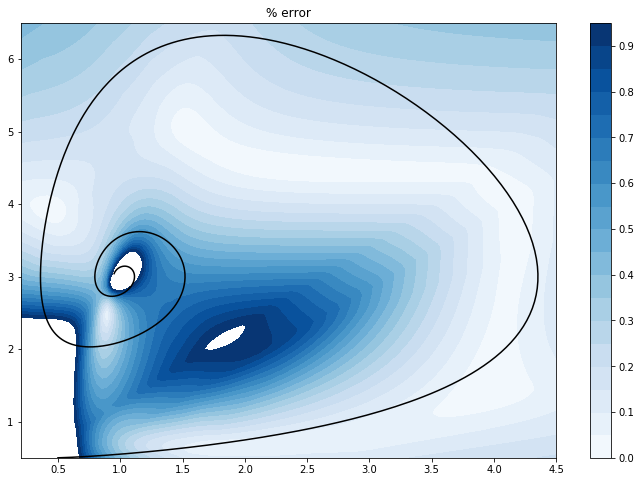

In [39]:
plt.figure(figsize=(12,8))
plt.contourf(X, Y, Z, cmap='Blues', levels=np.arange(0,1,0.05))
plt.plot(orig_traj[:,0],orig_traj[:,1], color='black')
plt.colorbar()
plt.title("% error")

## Reconstructed trajectory

In [40]:
def LV_Learned(xi0, t):
    return obs.predictor(torch.Tensor(xi0).view(1,2).to(device)).flatten().detach().cpu()

In [41]:
func = LV_Learned
t = np.linspace(0,Tf,N)
x0 = [0.5, 0.5]
sol = odeint(func, x0, t)

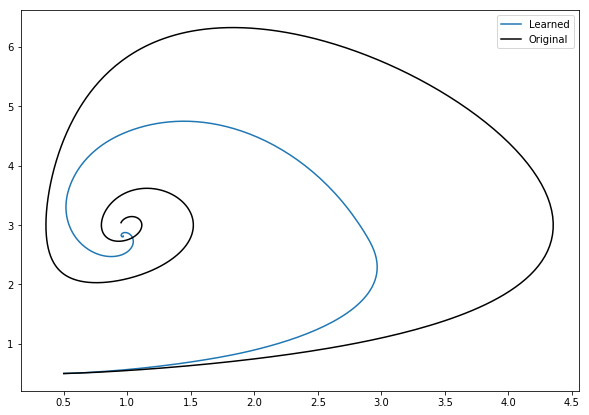

In [56]:
plt.figure(figsize=(10,7))
plt.plot([s[0] for s in sol], [s[1] for s in sol])
plt.plot(orig_traj[:,0],orig_traj[:,1], color='black')
plt.legend(['Learned','Original'])

# Iter training on multiple trajectories

Same idea as previous section, but with multiple trajectories (more gradient ground truth information available)

In [92]:
N = 1000
Tf = 10
Ts = Tf/N
t = np.linspace(0,Tf,N).tolist()
obs = HDNN('MLP', [[2, 20, 20, 20, 2], False], [1,1,0], 1, odeint='cpu')

#LV stuff
j = 0
a = 3.0
b = 1.0
c = 1.0
d = 1.0
# Dissipation rate
k = 0.25
t = np.linspace(0,Tf,N).tolist()
start = [[0.5, 0.5], [0.7, 0.7], [0.9, 0.9], [1.1, 1.1], [1.3, 1.3], \
         [1.5, 1.5], [1.7, 1.7], [1.9, 1.9]]
for j in range(len(start)):
    print("Currently learning trajectory: {}".format(j+1))
    x0 = start[j]
    x = odeint(LV,x0,t)
    # to tensor and reshape for obs.predictor
    x = torch.Tensor(x).to(device)
    x0 = x[0].view(1,2)
    
    # prepare dataloaders
    grad = ([LV(x[i], t) for i in range(len(x)-1)])
    grad = torch.Tensor([g for g in grad])
    train = data_utils.TensorDataset(x[:-1], grad)
    trainloader = data_utils.DataLoader(train, batch_size=1499)
  
    obs.fit(trainloader, epoch=1000, time_delta=100, iter_accuracy=float('inf'), ode_t=0.01, ode_step=2, criterion='mse')

Currently learning trajectory: 1
odeint iter: 10 
odeint iter: 20 
odeint iter: 30 
odeint iter: 40 
odeint iter: 50 
odeint iter: 60 
odeint iter: 70 
odeint iter: 80 
odeint iter: 90 
odeint iter: 100 
odeint iter: 110 
odeint iter: 120 
odeint iter: 130 
odeint iter: 140 
odeint iter: 150 
odeint iter: 160 
odeint iter: 170 
odeint iter: 180 
odeint iter: 190 
odeint iter: 200 
odeint iter: 210 
odeint iter: 220 
odeint iter: 230 
odeint iter: 240 
odeint iter: 250 
odeint iter: 260 
odeint iter: 270 
odeint iter: 280 
odeint iter: 290 
odeint iter: 300 
odeint iter: 310 
odeint iter: 320 
odeint iter: 330 
odeint iter: 340 
odeint iter: 350 
odeint iter: 360 
odeint iter: 370 
odeint iter: 380 
odeint iter: 390 
odeint iter: 400 
odeint iter: 410 
odeint iter: 420 
odeint iter: 430 
odeint iter: 440 
odeint iter: 450 
odeint iter: 460 
odeint iter: 470 
odeint iter: 480 
odeint iter: 490 
odeint iter: 500 
odeint iter: 510 
odeint iter: 520 
odeint iter: 530 
odeint iter: 540 
odei

odeint iter: 4370 
odeint iter: 4380 
odeint iter: 4390 
odeint iter: 4400 
odeint iter: 4410 
odeint iter: 4420 
odeint iter: 4430 
odeint iter: 4440 
odeint iter: 4450 
odeint iter: 4460 
odeint iter: 4470 
odeint iter: 4480 
odeint iter: 4490 
odeint iter: 4500 
odeint iter: 4510 
odeint iter: 4520 
odeint iter: 4530 
odeint iter: 4540 
odeint iter: 4550 
odeint iter: 4560 
odeint iter: 4570 
odeint iter: 4580 
odeint iter: 4590 
odeint iter: 4600 
odeint iter: 4610 
odeint iter: 4620 
odeint iter: 4630 
odeint iter: 4640 
odeint iter: 4650 
odeint iter: 4660 
odeint iter: 4670 
odeint iter: 4680 
odeint iter: 4690 
odeint iter: 4700 
odeint iter: 4710 
odeint iter: 4720 
odeint iter: 4730 
odeint iter: 4740 
odeint iter: 4750 
odeint iter: 4760 
odeint iter: 4770 
odeint iter: 4780 
odeint iter: 4790 
odeint iter: 4800 
odeint iter: 4810 
odeint iter: 4820 
odeint iter: 4830 
odeint iter: 4840 
odeint iter: 4850 
odeint iter: 4860 
odeint iter: 4870 
odeint iter: 4880 
odeint iter:

odeint iter: 8690 
odeint iter: 8700 
odeint iter: 8710 
odeint iter: 8720 
odeint iter: 8730 
odeint iter: 8740 
odeint iter: 8750 
odeint iter: 8760 
odeint iter: 8770 
odeint iter: 8780 
odeint iter: 8790 
odeint iter: 8800 
odeint iter: 8810 
odeint iter: 8820 
odeint iter: 8830 
odeint iter: 8840 
odeint iter: 8850 
odeint iter: 8860 
odeint iter: 8870 
odeint iter: 8880 
odeint iter: 8890 
odeint iter: 8900 
odeint iter: 8910 
odeint iter: 8920 
odeint iter: 8930 
odeint iter: 8940 
odeint iter: 8950 
odeint iter: 8960 
odeint iter: 8970 
odeint iter: 8980 
odeint iter: 8990 
odeint iter: 9000 
odeint iter: 9010 
odeint iter: 9020 
odeint iter: 9030 
odeint iter: 9040 
odeint iter: 9050 
odeint iter: 9060 
odeint iter: 9070 
odeint iter: 9080 
odeint iter: 9090 
odeint iter: 9100 
odeint iter: 9110 
odeint iter: 9120 
odeint iter: 9130 
odeint iter: 9140 
odeint iter: 9150 
odeint iter: 9160 
odeint iter: 9170 
odeint iter: 9180 
odeint iter: 9190 
odeint iter: 9200 
odeint iter:

odeint iter: 12860 
odeint iter: 12870 
odeint iter: 12880 
odeint iter: 12890 
odeint iter: 12900 
odeint iter: 12910 
odeint iter: 12920 
odeint iter: 12930 
odeint iter: 12940 
odeint iter: 12950 
odeint iter: 12960 
odeint iter: 12970 
odeint iter: 12980 
odeint iter: 12990 
odeint iter: 13000 
odeint iter: 13010 
odeint iter: 13020 
odeint iter: 13030 
odeint iter: 13040 
odeint iter: 13050 
odeint iter: 13060 
odeint iter: 13070 
odeint iter: 13080 
odeint iter: 13090 
odeint iter: 13100 
odeint iter: 13110 
odeint iter: 13120 
odeint iter: 13130 
odeint iter: 13140 
odeint iter: 13150 
odeint iter: 13160 
odeint iter: 13170 
odeint iter: 13180 
odeint iter: 13190 
odeint iter: 13200 
odeint iter: 13210 
odeint iter: 13220 
odeint iter: 13230 
odeint iter: 13240 
odeint iter: 13250 
odeint iter: 13260 
odeint iter: 13270 
odeint iter: 13280 
odeint iter: 13290 
odeint iter: 13300 
odeint iter: 13310 
odeint iter: 13320 
odeint iter: 13330 
odeint iter: 13340 
odeint iter: 13350 


odeint iter: 16940 
odeint iter: 16950 
odeint iter: 16960 
odeint iter: 16970 
odeint iter: 16980 
odeint iter: 16990 
odeint iter: 17000 
odeint iter: 17010 
odeint iter: 17020 
odeint iter: 17030 
odeint iter: 17040 
odeint iter: 17050 
odeint iter: 17060 
odeint iter: 17070 
odeint iter: 17080 
odeint iter: 17090 
odeint iter: 17100 
odeint iter: 17110 
odeint iter: 17120 
odeint iter: 17130 
odeint iter: 17140 
odeint iter: 17150 
odeint iter: 17160 
odeint iter: 17170 
odeint iter: 17180 
odeint iter: 17190 
odeint iter: 17200 
odeint iter: 17210 
odeint iter: 17220 
odeint iter: 17230 
odeint iter: 17240 
odeint iter: 17250 
odeint iter: 17260 
odeint iter: 17270 
odeint iter: 17280 
odeint iter: 17290 
odeint iter: 17300 
odeint iter: 17310 
odeint iter: 17320 
odeint iter: 17330 
odeint iter: 17340 
odeint iter: 17350 
odeint iter: 17360 
odeint iter: 17370 
odeint iter: 17380 
odeint iter: 17390 
odeint iter: 17400 
odeint iter: 17410 
odeint iter: 17420 
odeint iter: 17430 


odeint iter: 21050 
odeint iter: 21060 
odeint iter: 21070 
odeint iter: 21080 
odeint iter: 21090 
odeint iter: 21100 
odeint iter: 21110 
odeint iter: 21120 
odeint iter: 21130 
odeint iter: 21140 
odeint iter: 21150 
odeint iter: 21160 
odeint iter: 21170 
odeint iter: 21180 
odeint iter: 21190 
odeint iter: 21200 
odeint iter: 21210 
odeint iter: 21220 
odeint iter: 21230 
odeint iter: 21240 
odeint iter: 21250 
odeint iter: 21260 
odeint iter: 21270 
odeint iter: 21280 
odeint iter: 21290 
odeint iter: 21300 
odeint iter: 21310 
odeint iter: 21320 
odeint iter: 21330 
odeint iter: 21340 
odeint iter: 21350 
odeint iter: 21360 
odeint iter: 21370 
odeint iter: 21380 
odeint iter: 21390 
odeint iter: 21400 
odeint iter: 21410 
odeint iter: 21420 
odeint iter: 21430 
odeint iter: 21440 
odeint iter: 21450 
odeint iter: 21460 
odeint iter: 21470 
odeint iter: 21480 
odeint iter: 21490 
odeint iter: 21500 
odeint iter: 21510 
odeint iter: 21520 
odeint iter: 21530 
odeint iter: 21540 


odeint iter: 25150 
odeint iter: 25160 
odeint iter: 25170 
odeint iter: 25180 
odeint iter: 25190 
odeint iter: 25200 
odeint iter: 25210 
odeint iter: 25220 
odeint iter: 25230 
odeint iter: 25240 
odeint iter: 25250 
odeint iter: 25260 
odeint iter: 25270 
odeint iter: 25280 
odeint iter: 25290 
odeint iter: 25300 
odeint iter: 25310 
odeint iter: 25320 
odeint iter: 25330 
odeint iter: 25340 
odeint iter: 25350 
odeint iter: 25360 
odeint iter: 25370 
odeint iter: 25380 
odeint iter: 25390 
odeint iter: 25400 
odeint iter: 25410 
odeint iter: 25420 
odeint iter: 25430 
odeint iter: 25440 
odeint iter: 25450 
odeint iter: 25460 
odeint iter: 25470 
odeint iter: 25480 
odeint iter: 25490 
odeint iter: 25500 
odeint iter: 25510 
odeint iter: 25520 
odeint iter: 25530 
odeint iter: 25540 
odeint iter: 25550 
odeint iter: 25560 
odeint iter: 25570 
odeint iter: 25580 
odeint iter: 25590 
odeint iter: 25600 
odeint iter: 25610 
odeint iter: 25620 
odeint iter: 25630 
odeint iter: 25640 


odeint iter: 29260 
odeint iter: 29270 
odeint iter: 29280 
odeint iter: 29290 
odeint iter: 29300 
odeint iter: 29310 
odeint iter: 29320 
odeint iter: 29330 
odeint iter: 29340 
odeint iter: 29350 
odeint iter: 29360 
odeint iter: 29370 
odeint iter: 29380 
odeint iter: 29390 
odeint iter: 29400 
odeint iter: 29410 
odeint iter: 29420 
odeint iter: 29430 
odeint iter: 29440 
odeint iter: 29450 
odeint iter: 29460 
odeint iter: 29470 
odeint iter: 29480 
odeint iter: 29490 
odeint iter: 29500 
odeint iter: 29510 
odeint iter: 29520 
odeint iter: 29530 
odeint iter: 29540 
odeint iter: 29550 
odeint iter: 29560 
odeint iter: 29570 
odeint iter: 29580 
odeint iter: 29590 
odeint iter: 29600 
odeint iter: 29610 
odeint iter: 29620 
odeint iter: 29630 
odeint iter: 29640 
odeint iter: 29650 
odeint iter: 29660 
odeint iter: 29670 
odeint iter: 29680 
odeint iter: 29690 
odeint iter: 29700 
odeint iter: 29710 
odeint iter: 29720 
odeint iter: 29730 
odeint iter: 29740 
odeint iter: 29750 


odeint iter: 33360 
odeint iter: 33370 
odeint iter: 33380 
odeint iter: 33390 
odeint iter: 33400 
odeint iter: 33410 
odeint iter: 33420 
odeint iter: 33430 
odeint iter: 33440 
odeint iter: 33450 
odeint iter: 33460 
odeint iter: 33470 
odeint iter: 33480 
odeint iter: 33490 
odeint iter: 33500 
odeint iter: 33510 
odeint iter: 33520 
odeint iter: 33530 
odeint iter: 33540 
odeint iter: 33550 
odeint iter: 33560 
odeint iter: 33570 
odeint iter: 33580 
odeint iter: 33590 
odeint iter: 33600 
odeint iter: 33610 
odeint iter: 33620 
odeint iter: 33630 
odeint iter: 33640 
odeint iter: 33650 
odeint iter: 33660 
odeint iter: 33670 
odeint iter: 33680 
odeint iter: 33690 
odeint iter: 33700 
odeint iter: 33710 
odeint iter: 33720 
odeint iter: 33730 
odeint iter: 33740 
odeint iter: 33750 
odeint iter: 33760 
odeint iter: 33770 
odeint iter: 33780 
odeint iter: 33790 
odeint iter: 33800 
odeint iter: 33810 
odeint iter: 33820 
odeint iter: 33830 
odeint iter: 33840 
odeint iter: 33850 


odeint iter: 37470 
odeint iter: 37480 
odeint iter: 37490 
odeint iter: 37500 
odeint iter: 37510 
odeint iter: 37520 
odeint iter: 37530 
odeint iter: 37540 
odeint iter: 37550 
odeint iter: 37560 
odeint iter: 37570 
odeint iter: 37580 
odeint iter: 37590 
odeint iter: 37600 
odeint iter: 37610 
odeint iter: 37620 
odeint iter: 37630 
odeint iter: 37640 
odeint iter: 37650 
odeint iter: 37660 
odeint iter: 37670 
odeint iter: 37680 
odeint iter: 37690 
odeint iter: 37700 
odeint iter: 37710 
odeint iter: 37720 
odeint iter: 37730 
odeint iter: 37740 
odeint iter: 37750 
odeint iter: 37760 
odeint iter: 37770 
odeint iter: 37780 
odeint iter: 37790 
odeint iter: 37800 
odeint iter: 37810 
odeint iter: 37820 
odeint iter: 37830 
odeint iter: 37840 
odeint iter: 37850 
odeint iter: 37860 
odeint iter: 37870 
odeint iter: 37880 
odeint iter: 37890 
odeint iter: 37900 
odeint iter: 37910 
odeint iter: 37920 
odeint iter: 37930 
odeint iter: 37940 
odeint iter: 37950 
odeint iter: 37960 


odeint iter: 41550 
odeint iter: 41560 
odeint iter: 41570 
odeint iter: 41580 
odeint iter: 41590 
odeint iter: 41600 
odeint iter: 41610 
odeint iter: 41620 
odeint iter: 41630 
odeint iter: 41640 
odeint iter: 41650 
odeint iter: 41660 
odeint iter: 41670 
odeint iter: 41680 
odeint iter: 41690 
odeint iter: 41700 
odeint iter: 41710 
odeint iter: 41720 
odeint iter: 41730 
odeint iter: 41740 
odeint iter: 41750 
odeint iter: 41760 
odeint iter: 41770 
odeint iter: 41780 
odeint iter: 41790 
odeint iter: 41800 
odeint iter: 41810 
odeint iter: 41820 
odeint iter: 41830 
odeint iter: 41840 
odeint iter: 41850 
odeint iter: 41860 
odeint iter: 41870 
odeint iter: 41880 
odeint iter: 41890 
odeint iter: 41900 
odeint iter: 41910 
odeint iter: 41920 
odeint iter: 41930 
odeint iter: 41940 
odeint iter: 41950 
odeint iter: 41960 
odeint iter: 41970 
odeint iter: 41980 
odeint iter: 41990 
odeint iter: 42000 
odeint iter: 42010 
odeint iter: 42020 
odeint iter: 42030 
odeint iter: 42040 


odeint iter: 45650 
odeint iter: 45660 
odeint iter: 45670 
odeint iter: 45680 
odeint iter: 45690 
odeint iter: 45700 
odeint iter: 45710 
odeint iter: 45720 
odeint iter: 45730 
odeint iter: 45740 
odeint iter: 45750 
odeint iter: 45760 
odeint iter: 45770 
odeint iter: 45780 
odeint iter: 45790 
odeint iter: 45800 
odeint iter: 45810 
odeint iter: 45820 
odeint iter: 45830 
odeint iter: 45840 
odeint iter: 45850 
odeint iter: 45860 
odeint iter: 45870 
odeint iter: 45880 
odeint iter: 45890 
odeint iter: 45900 
odeint iter: 45910 
odeint iter: 45920 
odeint iter: 45930 
odeint iter: 45940 
odeint iter: 45950 
odeint iter: 45960 
odeint iter: 45970 
odeint iter: 45980 
odeint iter: 45990 
odeint iter: 46000 
odeint iter: 46010 
odeint iter: 46020 
odeint iter: 46030 
odeint iter: 46040 
odeint iter: 46050 
odeint iter: 46060 
odeint iter: 46070 
odeint iter: 46080 
odeint iter: 46090 
odeint iter: 46100 
odeint iter: 46110 
odeint iter: 46120 
odeint iter: 46130 
odeint iter: 46140 


odeint iter: 49730 
odeint iter: 49740 
odeint iter: 49750 
odeint iter: 49760 
odeint iter: 49770 
odeint iter: 49780 
odeint iter: 49790 
odeint iter: 49800 
odeint iter: 49810 
odeint iter: 49820 
odeint iter: 49830 
odeint iter: 49840 
odeint iter: 49850 
odeint iter: 49860 
odeint iter: 49870 
odeint iter: 49880 
odeint iter: 49890 
odeint iter: 49900 
odeint iter: 49910 
odeint iter: 49920 
odeint iter: 49930 
odeint iter: 49940 
odeint iter: 49950 
odeint iter: 49960 
odeint iter: 49970 
odeint iter: 49980 
odeint iter: 49990 
odeint iter: 50000 
odeint iter: 50010 
odeint iter: 50020 
odeint iter: 50030 
odeint iter: 50040 
odeint iter: 50050 
odeint iter: 50060 
odeint iter: 50070 
odeint iter: 50080 
odeint iter: 50090 
odeint iter: 50100 
odeint iter: 50110 
odeint iter: 50120 
odeint iter: 50130 
odeint iter: 50140 
odeint iter: 50150 
odeint iter: 50160 
odeint iter: 50170 
odeint iter: 50180 
odeint iter: 50190 
odeint iter: 50200 
odeint iter: 50210 
odeint iter: 50220 


odeint iter: 53830 
odeint iter: 53840 
odeint iter: 53850 
odeint iter: 53860 
odeint iter: 53870 
odeint iter: 53880 
odeint iter: 53890 
odeint iter: 53900 
odeint iter: 53910 
odeint iter: 53920 
odeint iter: 53930 
odeint iter: 53940 
odeint iter: 53950 
odeint iter: 53960 
odeint iter: 53970 
odeint iter: 53980 
odeint iter: 53990 
odeint iter: 54000 
odeint iter: 54010 
odeint iter: 54020 
odeint iter: 54030 
odeint iter: 54040 
odeint iter: 54050 
odeint iter: 54060 
odeint iter: 54070 
odeint iter: 54080 
odeint iter: 54090 
odeint iter: 54100 
odeint iter: 54110 
odeint iter: 54120 
odeint iter: 54130 
odeint iter: 54140 
odeint iter: 54150 
odeint iter: 54160 
odeint iter: 54170 
odeint iter: 54180 
odeint iter: 54190 
odeint iter: 54200 
odeint iter: 54210 
odeint iter: 54220 
odeint iter: 54230 
odeint iter: 54240 
odeint iter: 54250 
odeint iter: 54260 
odeint iter: 54270 
odeint iter: 54280 
odeint iter: 54290 
odeint iter: 54300 
odeint iter: 54310 
odeint iter: 54320 


odeint iter: 57910 
odeint iter: 57920 
odeint iter: 57930 
odeint iter: 57940 
odeint iter: 57950 
odeint iter: 57960 
odeint iter: 57970 
odeint iter: 57980 
odeint iter: 57990 
odeint iter: 58000 
odeint iter: 58010 
odeint iter: 58020 
odeint iter: 58030 
odeint iter: 58040 
odeint iter: 58050 
odeint iter: 58060 
odeint iter: 58070 
odeint iter: 58080 
odeint iter: 58090 
odeint iter: 58100 
odeint iter: 58110 
odeint iter: 58120 
odeint iter: 58130 
odeint iter: 58140 
odeint iter: 58150 
odeint iter: 58160 
odeint iter: 58170 
odeint iter: 58180 
odeint iter: 58190 
odeint iter: 58200 
odeint iter: 58210 
odeint iter: 58220 
odeint iter: 58230 
odeint iter: 58240 
odeint iter: 58250 
odeint iter: 58260 
odeint iter: 58270 
odeint iter: 58280 
odeint iter: 58290 
odeint iter: 58300 
odeint iter: 58310 
odeint iter: 58320 
odeint iter: 58330 
odeint iter: 58340 
odeint iter: 58350 
odeint iter: 58360 
odeint iter: 58370 
odeint iter: 58380 
odeint iter: 58390 
odeint iter: 58400 


odeint iter: 62030 
odeint iter: 62040 
odeint iter: 62050 
odeint iter: 62060 
odeint iter: 62070 
odeint iter: 62080 
odeint iter: 62090 
odeint iter: 62100 
odeint iter: 62110 
odeint iter: 62120 
odeint iter: 62130 
odeint iter: 62140 
odeint iter: 62150 
odeint iter: 62160 
odeint iter: 62170 
odeint iter: 62180 
odeint iter: 62190 
odeint iter: 62200 
odeint iter: 62210 
odeint iter: 62220 
odeint iter: 62230 
odeint iter: 62240 
odeint iter: 62250 
odeint iter: 62260 
odeint iter: 62270 
odeint iter: 62280 
odeint iter: 62290 
odeint iter: 62300 
odeint iter: 62310 
odeint iter: 62320 
odeint iter: 62330 
odeint iter: 62340 
odeint iter: 62350 
odeint iter: 62360 
odeint iter: 62370 
odeint iter: 62380 
odeint iter: 62390 
odeint iter: 62400 
odeint iter: 62410 
odeint iter: 62420 
odeint iter: 62430 
odeint iter: 62440 
odeint iter: 62450 
odeint iter: 62460 
odeint iter: 62470 
odeint iter: 62480 
odeint iter: 62490 
odeint iter: 62500 
odeint iter: 62510 
odeint iter: 62520 


#### trajectories used to learn

In [93]:
t = np.linspace(0,Tf,N).tolist()
trajectories = []
for p in start:
    sol = odeint(LV, p, t)
    trajectories.append(sol)

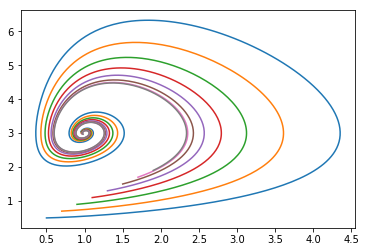

In [94]:
for i in range(len(start)):
    plt.plot([p[0] for p in trajectories[i]], [p[1] for p in trajectories[i]])

In [95]:
mh = genpoints(0, 4.5, 0, 6.5, 15)

In [96]:
U, V = [], []
for point in mh:
        un, vn = obs.predictor(point.view(1,2))[0][0], obs.predictor(point.view(1,2))[0][1]
        U.append(un)
        V.append(vn)

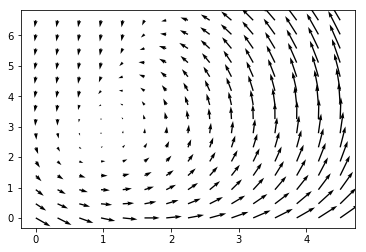

In [97]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [98]:
Uo, Vo = U, V

In [99]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in mh:
        xi0 = point.cpu()
        un, vn = LV(xi0, t)
        U.append(un)
        V.append(vn)

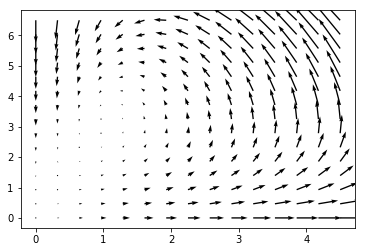

In [100]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

Text(0.5, 1.0, 'Lotke-Volterra reconstruction')

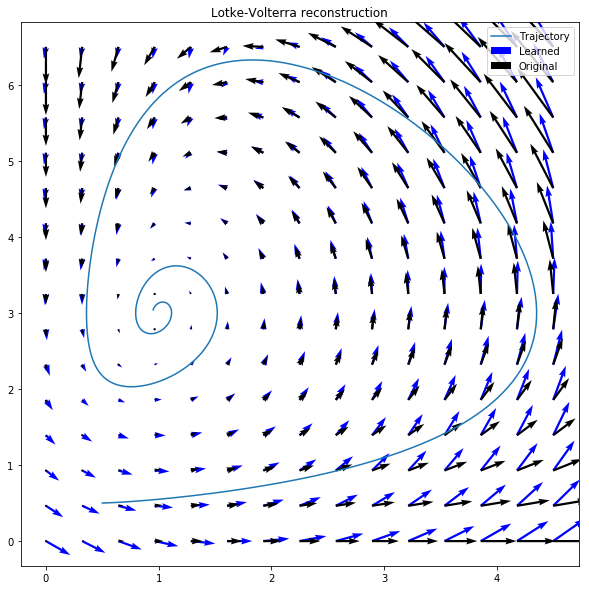

In [101]:
plt.figure(figsize=(10,10))
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in Uo], [v.detach().cpu() for v in Vo], color='blue')
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V], color='black')
plt.plot(orig_traj[:,0],orig_traj[:,1])
plt.legend(['Trajectory','Learned','Original'])
plt.title("Lotke-Volterra reconstruction")

## Error contour plot

In [102]:
x = np.linspace(0.2, 4.5, 100)
y = np.linspace(0.5, 6.5, 100)
X, Y = np.meshgrid(x, y)

In [103]:
# integrate for Ts time
diff_norm = []
t = torch.linspace(0,Ts,2)
for i in range(len(X)):
    for j in range(len(Y)):
        xi0 = [X[i][j], Y[i][j]]
        un, vn = LV(xi0, t)
        point = torch.Tensor(xi0).view(1,2).to(device)
        (unp, vnp) = obs.predictor(point).flatten()[0], obs.predictor(point).flatten()[1]
        diff_norm.append([[X[i][j], Y[i][j]], normedDifference((unp, vnp),(un, vn))])

In [104]:
Z = np.reshape(np.array([el[1] for el in diff_norm]), (100, 100))

Text(0.5, 1.0, '% error')

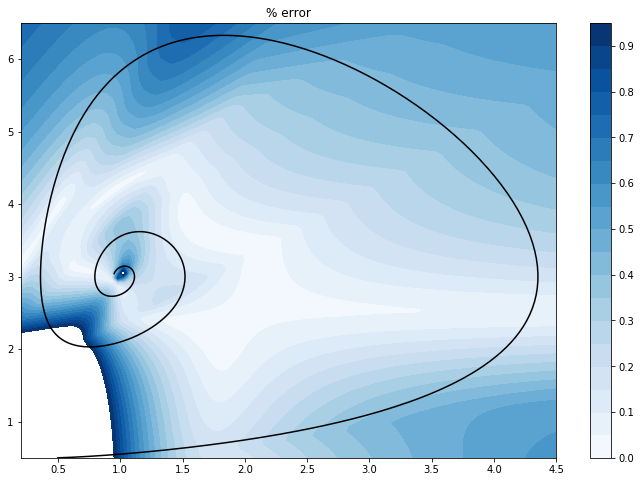

In [105]:
plt.figure(figsize=(12,8))
plt.contourf(X, Y, Z, cmap='Blues', levels=np.arange(0,1,0.05))
plt.plot(orig_traj[:,0],orig_traj[:,1], color='black')
plt.colorbar()
plt.title("% error")

### Reconstructed trajectory

In [106]:
def LV_Learned(xi0, t):
    return obs.predictor(torch.Tensor(xi0).view(1,2).to(device)).flatten().detach().cpu()

In [107]:
func = LV_Learned
t = np.linspace(0,Tf,N)
x0 = [0.5, 0.5]
sol = odeint(func, x0, t)

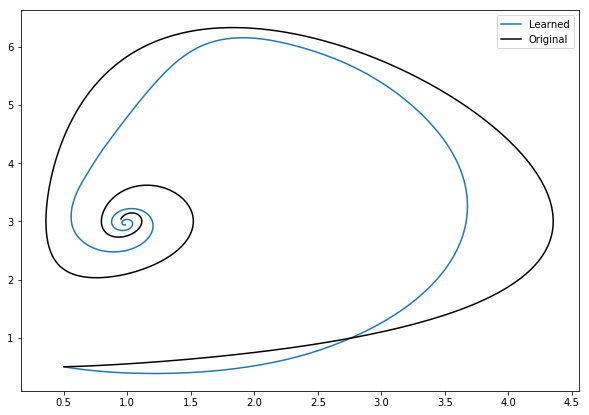

In [108]:
plt.figure(figsize=(10,7))
plt.plot([s[0] for s in sol], [s[1] for s in sol])
plt.plot(orig_traj[:,0],orig_traj[:,1], color='black')
plt.legend(['Learned','Original'])

## LSTM attempt with multiple trajectories

In [14]:
obs = HDNN('LSTM', [2,36], [1,2,0], 1, p_module=__name__, odeint='cpu')

In [28]:
x = torch.Tensor(x).to(device)
x[1:]
x0 = x[0].view(1,2)

In [16]:
grad = ([(x[i+1] - x[i])/0.01 for i in range(len(x)-1)])
grad = torch.Tensor([g.cpu().numpy() for g in grad])

In [17]:
train = data_utils.TensorDataset(x[:-1], grad)
trainloader = data_utils.DataLoader(train, batch_size=1499)

In [18]:
obs.fit(trainloader, epoch=1000, time_delta=100, iter_accuracy=float('inf'), ode_t=0.01, ode_step=2, criterion='mse')

RuntimeError: input must have 3 dimensions, got 2

In [ ]:
LSTM()